In [ ]:
import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Input, Flatten, Reshape, LeakyReLU as LR, Activation, Dropout
from tensorflow.keras import Sequential, Model, Input
from tensorflow.keras import layers
from tensorflow.keras.models import Model, Sequential
from matplotlib import pyplot as plt
from IPython import display # If using IPython, Colab or Jupyter
import numpy as np
from sklearn.cluster import KMeans, SpectralClustering
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn import preprocessing
import tensorflow as tf

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

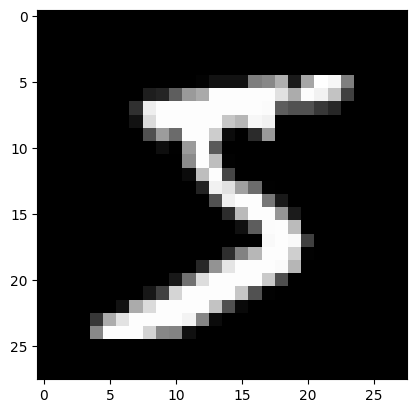

In [ ]:
# Plot image data from x_train
exmpl = x_train[0].reshape(28,28)
plt.imshow(exmpl, cmap = "gray")
plt.show()

In [ ]:
def compute_w(data, label):
    w = np.zeros(784)
    for i in range(784):
      for j in range(100):
        for k in range(100):
          if label[j] == label[k]:
            w[i] += np.exp(-(data[j,i]-data[k,i])**2)
          else:
            w[i] += 1 - np.exp(-(data[j,i]-data[k,i])**2)
    w = preprocessing.normalize([w])
    return w

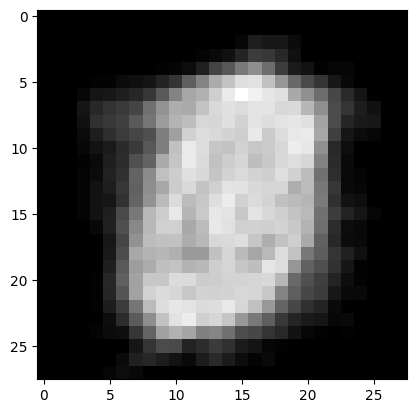

In [ ]:
w = compute_w(x_train, y_train)
w = w.reshape((28, 28))
plt.imshow(w, cmap='gray')
w = w.reshape((784,))

In [ ]:
def loss_func(y_true, y_pred):
  loss = w*((y_true - y_pred)**2)
  print(loss)
  return tf.reduce_mean(loss)

part 1:

In [ ]:
def encoder_f():
    input = Input(shape=(784,))
    lay1 = Dense(512)(input)
    lay2 = keras.activations.relu(lay1)
    lay3 = keras.activations.tanh(lay2)
    lay4 = Dense(128)(lay3)
    lay5 = keras.activations.relu(lay4)
    lay6 = keras.activations.tanh(lay5)
    lay7 = Dense(32)(lay6)
    lay8 = keras.activations.tanh(lay7)
    lay9 = Dense(10)(lay8)
    # return lay9
    encoder_model = Model(inputs=input, outputs=lay9)
    encoder_model.summary()
    return encoder_model

In [ ]:
def decoder_f():
    input = Input(shape=(10,))
    lay1 = Dense(32)(input)
    lay2 = keras.activations.tanh(lay1)
    lay3 = Dense(128)(lay2)
    lay4 = keras.activations.tanh(lay3)
    lay5 = Dense(512)(lay4)
    lay6 = keras.activations.tanh(lay5)
    lay7 = Dense(784)(lay6)
    lay8 = keras.activations.sigmoid(lay7)
    # reshaped = Reshape((28, 28))(lay8)
    # return reshaped
    decoder_model = Model(inputs=input, outputs=lay8)
    decoder_model.summary()
    return decoder_model

In [ ]:
#from keras.optimizers import adam
img = Input(shape = (28, 28))
img = Flatten(input_shape = (28, 28))(img)


encoder = encoder_f()
decoder = decoder_f()

latent_vector = encoder(img)
output = decoder(latent_vector)

model = Model(inputs = img, outputs = output)
model.summary()
optimiser = tf.keras.optimizers.Adam(learning_rate=3e-4, weight_decay = 0.00001 )
model.compile(optimizer = optimiser, loss = loss_func, metrics=['accuracy'])

EPOCHS = 6

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 tf.nn.relu (TFOpLambda)     (None, 512)               0         
                                                                 
 tf.math.tanh (TFOpLambda)   (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 tf.nn.relu_1 (TFOpLambda)   (None, 128)               0         
                                                                 
 tf.math.tanh_1 (TFOpLambda  (None, 128)               0     

part 2:


1/1 [==============================] - 0s 16ms/step


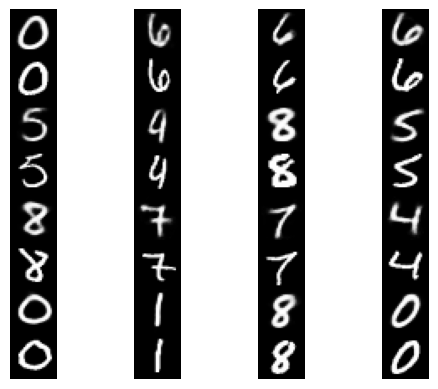

----------- EPOCH 4 -----------
1875/1875 [==============================] - 9s 5ms/step - loss: 5.2033e-04 - accuracy: 0.0133


In [ ]:
EPOCHS = 50
for epoch in range(EPOCHS):
    fig, axs = plt.subplots(8, 4)
    rand = x_test[np.random.randint(0, 10000, 16)].reshape((4, 4, 1, 784))

    display.clear_output() # If you imported display from IPython

    for i in range(4):
        for j in range(4):
            pred = model.predict(rand[i, j])[0]
            pred = pred.reshape(28,28)
            axs[2*i, j].imshow(pred, cmap = "gray")
            axs[2*i, j].axis("off")

            axs[2*i+1, j].imshow(rand[i,j].reshape(28,28), cmap = "gray")
            axs[2*i+1, j].axis("off")

    plt.subplots_adjust(wspace = 0, hspace = 0)
    plt.show()
    print("-----------", "EPOCH", epoch, "-----------")
    model.fit(x_train, x_train)

*part* 4:

In [ ]:
encoder_output = encoder.predict(x_train)

1875/1875 [==============================] - 3s 2ms/step


In [ ]:
km = KMeans(n_clusters=10, max_iter=200)
km.fit(encoder_output)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=200, n_clusters=10)

In [ ]:
y_pred = km.predict(encoder_output)

part 5:

In [ ]:
adjusted_rand_score(y_train, y_pred)

0.5263510077602113

In [ ]:
km = KMeans(n_clusters=10, max_iter=200)
km.fit(x_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=200, n_clusters=10)

In [ ]:
y_pred = km.predict(x_train)

In [ ]:
adjusted_rand_score(y_train, y_pred)

0.3608788725590002